In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# prompt: write ssh_key to ~/.ssh/ to use for github
from google.colab import userdata
ssh_key = userdata.get('google-colab-ssh-key-github')
ssh_key = ssh_key + '\n'
ssh_key = ssh_key.replace('\r', "")

import os

if ssh_key:
  home_dir = os.path.expanduser('~')
  ssh_dir = os.path.join(home_dir, '.ssh')
  os.makedirs(ssh_dir, exist_ok=True)
  ssh_key_path = os.path.join(ssh_dir, 'id_ed25519')

  with open(ssh_key_path, 'w') as f:
    f.write(ssh_key)

  !chmod 600 {ssh_key_path}

  # Add your github.com entry to known_hosts if needed
  !ssh-keyscan -t ed25519 github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-54efa404d


In [ ]:
!git clone git@github.com:padillacoreanolab/diff_fam_social_memory_ephys.git

Cloning into 'diff_fam_social_memory_ephys'...
remote: Enumerating objects: 1160, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 1160 (delta 33), reused 41 (delta 19), pack-reused 1094 (from 1)
Receiving objects: 100% (1160/1160), 196.92 MiB | 8.42 MiB/s, done.
Resolving deltas: 100% (645/645), done.
Updating files: 100% (124/124), done.


In [ ]:
%cd diff_fam_social_memory_ephys/lfp

/content/diff_fam_social_memory_ephys/lfp


In [ ]:
%ls

 01_rce3_extract_lfp_channel_verification_alone_comp.ipynb   meg_input_creation.ipynb
 abe-scratch.py                                              meg_phase2_analysis.ipynb
 archive/                                                    meg_phase3_analysis.ipynb
 convert_to_mp4.sh                                           README.md
 cups_LFP_creation.ipynb                                     rec3.py
 fucked_lfp_analysis.py                                      requirements-gpu.txt
 __init__.py                                                 requirements.txt
 input/                                                      scratch.ipynb
 lfp_analysis/                                               tester.ipynb
 lfp_analysis.ipynb                                          tests/
'meg_input_creation copy.ipynb'                              trodes/


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.1/803.1 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.1/655.1 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.2 MB/s eta 0:00:00
   ━━━

In [ ]:
!python -m tests.utils download_test_data

Extracting files to... tests/test_data
Renamed file to: tests/test_data/Example_Recording/example_recording_merged.rec
Renamed file to: tests/test_data/Example_Recording/example_recording_merged.trodesconf
Download and extraction complete!


In [ ]:
!python -m unittest discover

...Processing example_recording_merged.rec
/content/diff_fam_social_memory_ephys/lfp/trodes/read_exported.py:168: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dtype_spec)
Found first timestamp
Found first timestamp
Processing example_recording_merged.rec
Found first timestamp
Found first timestamp
.Processing example_recording_merged.rec
Found first timestamp
Found first timestamp
.Processing example_recording_merged.rec
Found first timestamp
Found first timestamp
.Processing example_recording_merged.rec
Found first timestamp
Found first timestamp
.sampling freq 200
half bandwidth 2
duration 1
step 0.5
sampling freq 200
half bandwidth 2
duration 1
step 0.5
Power Calculated
sampling freq 200
half bandwidth 2
duration 1
step 0.5
Coherence calcualatd
......
----------------------------------------------------------------------
Ran 13 tests in 35.465s

OK


In [ ]:

import numpy as np
import cupy as cp



x_gpu = cp.array([1, 2, 3])
l2_gpu = cp.linalg.norm(x_gpu)

In [ ]:
%env SPECTRAL_CONNECTIVITY_ENABLE_GPU=true

env: SPECTRAL_CONNECTIVITY_ENABLE_GPU=true


In [ ]:
import numpy as xp
from scipy.fft import ifft
from scipy.sparse.linalg import svds

In [ ]:
import logging
import os
logger = logging.getLogger(__name__)
if os.environ.get("SPECTRAL_CONNECTIVITY_ENABLE_GPU") == "true":
    try:
        logger.info("Using GPU for spectral_connectivity...")
        print("USING GRAPHICS")

    except ImportError:
        print(
            "Cupy not installed. Cupy is needed to use GPU for "
            "spectral_connectivity."
        )
        import numpy as xp
        from scipy.fft import ifft
        from scipy.sparse.linalg import svds
else:
    print("USING CPU")
    logger.info("Using CPU for spectral_connectivity...")
    import numpy as xp
    from scipy.fft import ifft
    from scipy.sparse.linalg import svds

USING GRAPHICS


Text(0.5, 1.0, 'Frequency Domain')

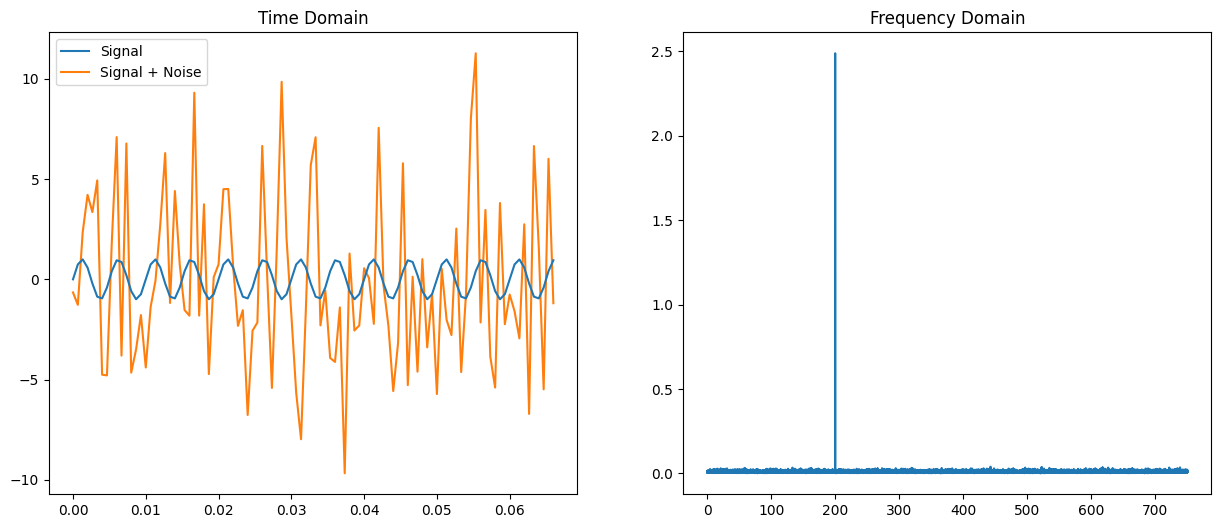

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from spectral_connectivity import Multitaper
from spectral_connectivity import Connectivity
from spectral_connectivity import multitaper_connectivity
# Simulate signal with noise
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 50)
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time * frequency_of_interest)
noise = np.random.normal(0, 4, len(signal))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(time[:100], signal[:100], label="Signal", zorder=3)
axes[0].plot(time[:100], signal[:100] + noise[:100], label="Signal + Noise")
axes[0].legend()
axes[0].set_title("Time Domain")

multitaper = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

axes[1].plot(connectivity.frequencies, connectivity.power().squeeze())
axes[1].set_title("Frequency Domain")

In [4]:
from lfp_analysis.LFP_recording import LFPRecording

merged_path = r"C:\Users\Padilla-Coreano\UFL Dropbox\Caroline De Paula Cunha Almeida\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Cups\11_cups_p4.rec\11_cups_p4_merged.rec"


rec_test = LFPRecording('1.1',{}, {"mPFC": 1, "vHPC": 31, "BLA": 30, "NAc": 28, "MD": 29}, merged_path, r"C:\Users\Padilla-Coreano\Desktop\Trodes_2-4-0_Windows64")

rms_traces = rec_test.get_rms_traces()
rec_test.plot_to_find_threshold(threshold = 4)

Processing 11_cups_p4_merged.rec
Found first timestamp


AttributeError: 'LFPRecording' object has no attribute 'get_rms_traces'

In [ ]:
I_HAVE_PLOTTED_AND_THIS_LOOKS_GOOD = 4
rec_test.process(I_HAVE_PLOTTED_AND_THIS_LOOKS_GOOD)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(rec_test.rms_traces[0].T)
axes[0].set_title("Time Domain")
#connectivity.power.() = [timebins, frequencies, signal]
average_power = np.mean(rec_test.power, axis = 0)
print(average_power.shape)
axes[1].plot(rec_test.frequencies[0:100], average_power[0:100, 0])
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Power")

In [2]:
from cupy import cublas

ImportError: DLL load failed while importing cublas: The specified module could not be found.

In [1]:
%env CUDA_PATH=C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.6\\bin

env: CUDA_PATH=C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.6\\bin


In [1]:
import os
print('Add DLL path {}'.format(os.path.join(os.environ['CUDA_PATH'], 'bin')))

KeyError: 'CUDA_PATH'

In [3]:
import cupy as xp
from cupyx.scipy.fft import ifft
from cupyx.scipy.sparse.linalg import svds

In [8]:
a  = xp.array([1,2,3])
xp.matmul(a, a.T)

array(14)

In [1]:


import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp
merged_path = r"C:\Users\Padilla-Coreano\UFL Dropbox\Caroline De Paula Cunha Almeida\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Cups\11_cups_p4.rec\11_cups_p4_merged.rec"
recording = se.read_spikegadgets(merged_path, stream_id="trodes")
recording = sp.resample(recording, resample_rate=1000)
traces = recording.get_traces(channel_ids=[str(x) for x in range(25, 31)])

c:\Users\Padilla-Coreano\.conda\envs\ephy_analysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Padilla-Coreano\.conda\envs\ephy_analysis\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2024-11-19 14:32:25 -05:00)


In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 47 ms (started: 2024-11-19 15:00:37 -05:00)


In [5]:
import importlib
from inspect import getmembers, isfunction

from spectral_connectivity import Multitaper, Connectivity

import cupy as cp

c_traces = cp.asarray(traces)

multi_t = Multitaper(
    # multitaper takes in a time_series that is time by signals (regions)
    time_series=traces,
    sampling_frequency=1000,
    time_halfbandwidth_product=2,
    time_window_duration=1,
    time_window_step=.5,
)
connectivity = Connectivity.from_multitaper(multi_t)


In [3]:
import cupy as cp

x = cp.array([1,2,3])
x

array([1, 2, 3])

In [ ]:
granger = connectivity.pairwise_spectral_granger_prediction()

In [ ]:
granger

array([[[[           nan, 4.54973642e+00, 6.44574662e-01,
          1.79091091e-01, 5.61699097e-02, 1.58480708e-01],
         [4.32565801e+00,            nan, 1.07932358e+00,
          1.78401382e-01, 6.37550361e-02, 9.21144406e-02],
         [3.24271151e+00, 1.41153372e+00,            nan,
          7.33141641e-01, 3.77093550e-01, 3.03010557e-02],
         [6.59255538e-01, 5.06680970e-01, 6.55014038e-01,
                     nan, 4.00833684e+00, 5.25388393e-01],
         [1.45400641e-02, 6.64932332e-02, 8.22034272e-01,
          4.12380437e+00,            nan, 8.01612854e-02],
         [2.49128869e-02, 1.34138501e-03, 6.56108770e-01,
          2.12412495e-01, 1.08682257e-01,            nan]],

        [[           nan, 2.57783678e-01, 7.29070157e-01,
          4.33218533e-01, 2.76969541e-01, 4.82925061e-01],
         [3.11043498e-01,            nan, 4.30270894e-01,
          4.33464895e-01, 2.41006744e-01, 3.86596244e-01],
         [3.22408372e-01, 1.26980967e-01,            nan,
    

time: 34.5 ms (started: 2024-11-19 04:54:37 +00:00)


ValueError: x and y can be no greater than 2D, but have shapes (5189,) and (5189, 500, 6, 6)

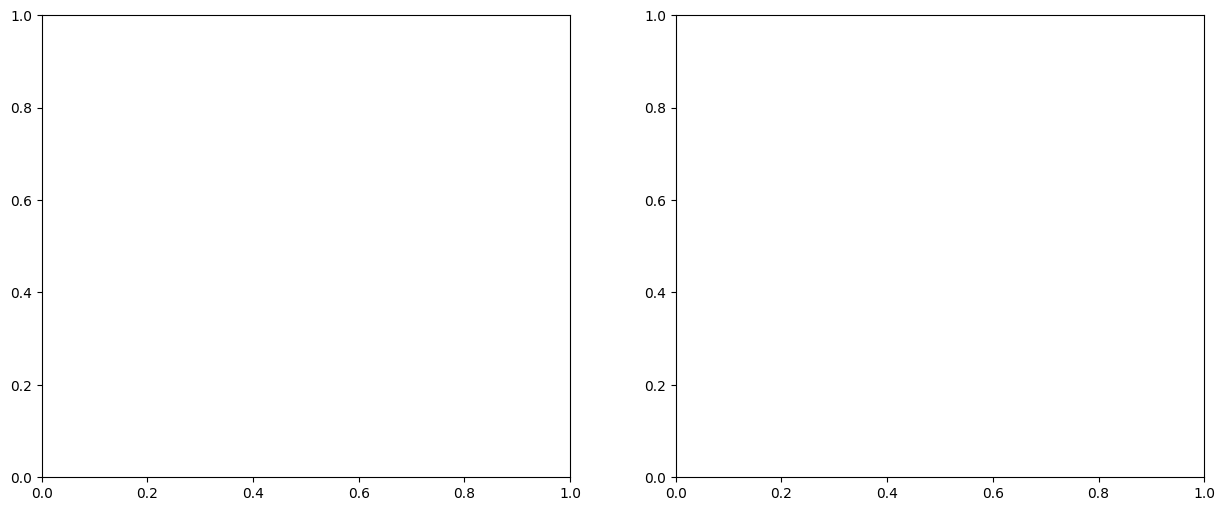

time: 290 ms (started: 2024-11-19 04:53:10 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(granger)
axes[0].set_title("granger")

In [ ]:
connectivity.power().squeeze()

array([[[4.86393129e+02, 4.07368422e+02, 2.24165490e+01, 2.40760704e+03,
         7.47386052e+02, 1.62971464e+03],
        [1.14996905e+03, 1.02749057e+03, 3.20176286e+02, 2.05233004e+03,
         1.05507849e+03, 1.23067263e+03],
        [2.25161031e+03, 2.05953128e+03, 9.53242714e+02, 2.25351328e+03,
         2.22977703e+03, 3.68894373e+03],
        ...,
        [3.32671715e-02, 2.99669756e-02, 3.72728894e-02, 2.38772079e-02,
         2.03824124e-02, 3.22849550e-02],
        [1.45630873e-02, 1.51850245e-02, 2.55612450e-02, 1.96863647e-02,
         8.56496055e-03, 2.07543238e-02],
        [2.02930306e-02, 1.90051068e-02, 3.01590005e-02, 1.32290071e-02,
         9.74781010e-03, 1.45289422e-02]],

       [[5.53653409e+02, 4.95469486e+02, 1.32986539e+02, 2.05163090e+03,
         1.03424392e+03, 2.61978753e+03],
        [6.87534727e+02, 8.16776994e+02, 3.94842680e+02, 1.22005605e+03,
         7.94090527e+02, 1.93351526e+03],
        [1.17075176e+03, 1.19313664e+03, 9.01971156e+02, 1.384210

time: 111 ms (started: 2024-11-19 04:34:33 +00:00)


In [ ]:
connectivity._cross_spectral_matrix

In [ ]:
connectivity._expectation_cross_spectral_matrix()

In [ ]:
cp_arr = cp.array([[1, 2, 3],
[5, 6, 7],
[8, 9, 10]
                   ])
from spectral_connectivity.connectivity import _conjugate_transpose
_conjugate_transpose(cp_arr)

In [ ]:
import cupy
mempool = cupy.get_default_memory_pool()
mempool.free_all_blocks()
pinned_mempool = cupy.get_default_pinned_memory_pool()

pinned_mempool.free_all_blocks()

time: 29.8 ms (started: 2024-11-19 04:34:56 +00:00)


In [ ]:
!nvidia-smi -caa

Cleared Accounted PIDs for GPU 00000000:00:03.0.
All done.
time: 126 ms (started: 2024-11-19 04:34:53 +00:00)
